# Logistic regression

In this notebook we are going to build logistic regression models on our full dataset and small size datasets. For the full size dataset we will build two models. One where we do not pay attention to class imbalance and one where we do. For the small size dataset where we have not manually balanced the data, we will create two models with the same procedure as with the full size dataset. However, with the manually balanced small dataset we will create the model without using the parameter class_weight = 'balance'. In this way, we can compare wether it works best to manually balance the dataset or use the built in parameter class_weight in LogisticRegression. 

## Libraries
---

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

## Logistic Regression on the full size dataset
---

### Loading and splitting the data

In [8]:
df = pd.read_csv('../data/pre-processed-data/data-full-size.csv')
df.head()

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,1,1,44,1,0,1,40454.0,217,1,...,0,0,0,0,0,0,0,0,0,1
1,1,2,1,76,1,0,0,33536.0,183,0,...,0,0,0,0,0,0,0,1,0,0
2,2,3,1,47,1,0,1,38294.0,27,1,...,0,0,0,0,0,0,0,0,0,1
3,3,4,1,21,1,1,0,28619.0,203,0,...,0,0,0,0,0,0,0,0,1,0
4,4,5,0,29,1,1,0,27496.0,39,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
df = df.iloc[:,2:]
df

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,0,1,40454.0,217,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,76,1,0,0,33536.0,183,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,47,1,0,1,38294.0,27,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,21,1,1,0,28619.0,203,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,29,1,1,0,27496.0,39,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,1,0,30170.0,88,0,0,0,...,0,0,0,0,0,0,0,1,0,0
381105,1,30,1,1,0,40016.0,131,0,0,0,...,0,0,0,0,0,0,0,0,1,0
381106,1,21,1,1,0,35118.0,161,0,0,0,...,0,0,0,0,0,1,0,0,1,0
381107,0,68,1,0,1,44617.0,74,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [28]:
X = df.drop('Response', axis = 1)
y = df['Response']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(285831, 218)
(285831,)
(95278, 218)
(95278,)


### Creating and tuning the model

In [38]:
l_reg = LogisticRegression(C = 0.08)
l_reg.fit(X_train, y_train)

print('With our initial Logistic regression model we are able to get a test score of {}'.format(l_reg.score(X_test, y_test)))

With our initial Logistic regression model we are able to get a test score of 0.876246352778186


Now we will try to optimize our logistic regression model by choosing some different values of C. Furthermore, we will also try to create some models where the parameter class_weight = 'balanced' which is described as below from sci-kit learn. This is done because our target value 'Response' has the following balance {0: 334399, 1: 46710}. 

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [22]:
def logistic_c_trials(c_list, X_train, X_test, y_train, y_test):
    scores_dict = {'Train Score': [], 'Test Score': [], 'C': []}
    
    for c in c_list:
        #We increase the number of iterations since we are given a warning that it says try to increase. 
        model = LogisticRegression(C=c, max_iter=10000)

        model.fit(X_train, y_train)
        scores_dict['Train Score'].append(model.score(X_train, y_train))
        scores_dict['Test Score'].append(model.score(X_test, y_test))
        scores_dict['C'].append(c)
    
    return scores_dict

In [41]:
c_list = [0.0000001, 0.000001, 0.0002, 0.005, 0.7, 100, 10000]
results = logistic_c_trials(c_list, X_train, X_test, y_train, y_test)

In [35]:
results

{'Train Score': [0.8771336908872726,
  0.8771336908872726,
  0.8771336908872726,
  0.8757342625537468,
  0.8751325083703307,
  0.8751255112286631,
  0.8751255112286631],
 'Test Score': [0.8783454732467096,
  0.8783454732467096,
  0.8783454732467096,
  0.8765192384390941,
  0.8761938747664728,
  0.8762043703688155,
  0.8762043703688155],
 'C': [1e-07, 1e-06, 0.0002, 0.005, 0.7, 100, 10000]}

In [23]:
def logistic_c_trials_balanced(c_list, X_train, X_test, y_train, y_test):
    scores_dict = {'Train Score': [], 'Test Score': [], 'C': []}
    
    for c in c_list:
        #We increase the number of iterations since we are given a warning that it says try to increase. 
        #Note, that we set class_weight = 'balanced' to see if can make a difference. 
        model = LogisticRegression(C=c, max_iter=10000, class_weight='balanced')

        model.fit(X_train, y_train)
        scores_dict['Train Score'].append(model.score(X_train, y_train))
        scores_dict['Test Score'].append(model.score(X_test, y_test))
        scores_dict['C'].append(c)
    
    return scores_dict

In [44]:
results_balanced = logistic_c_trials_balanced(c_list, X_train, X_test, y_train, y_test)

In [49]:
results_balanced

{'Train Score': [0.4668772806308623,
  0.5269827275557935,
  0.7039964174634662,
  0.7129807473647015,
  0.7137504329481407,
  0.7137609286606421,
  0.7137609286606421],
 'Test Score': [0.46561640672558197,
  0.5263439618799723,
  0.7037721194819371,
  0.7126723902684775,
  0.713512038455887,
  0.7135015428535444,
  0.7135015428535444],
 'C': [1e-07, 1e-06, 0.0002, 0.005, 0.7, 100, 10000]}

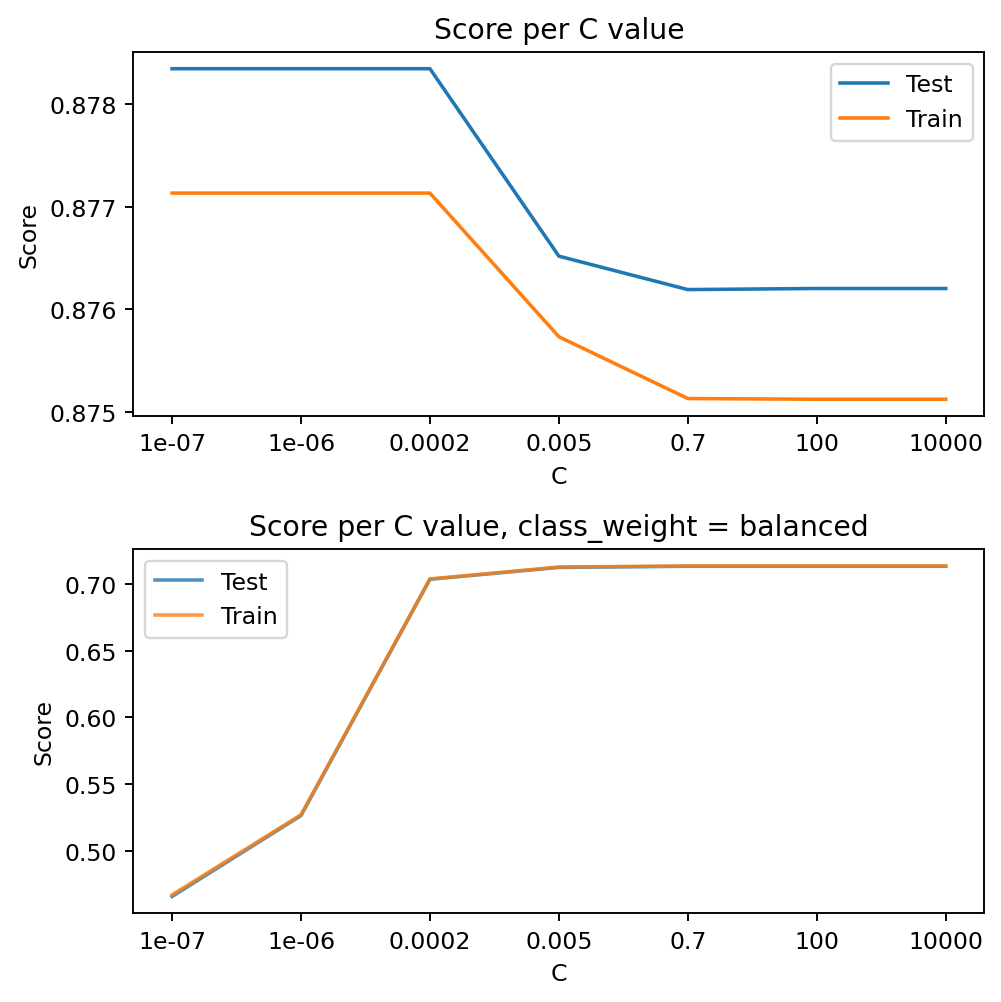

In [55]:
fig, ax = plt.subplots(nrows = 2, ncols=1, figsize = (6,6), dpi = 170)
ax[0].plot(range(len(results['C'])), results['Test Score'], label = 'Test')
ax[0].plot(range(len(results['C'])), results['Train Score'], label = 'Train')
ax[0].set_xticks(range(len(c_list)))
ax[0].set_xticklabels(c_list)
ax[0].legend()
ax[0].set(xlabel = 'C', ylabel = 'Score', title = 'Score per C value')

ax[1].plot(range(len(results_balanced['C'])), results_balanced['Test Score'], label = 'Test', alpha = 0.8)
ax[1].plot(range(len(results_balanced['C'])), results_balanced['Train Score'], label = 'Train', alpha = 0.8)
ax[1].set_xticks(range(len(c_list)))
ax[1].set_xticklabels(c_list)
ax[1].legend()
ax[1].set(xlabel = 'C', ylabel = 'Score', title = 'Score per C value, class_weight = balanced')

plt.tight_layout()
plt.show()

In [30]:
def find_best_c(c_list, test_scores):
    max_test_score = max(test_scores)
    max_test_score_index = np.argmax(test_scores)
    best_c = c_list[max_test_score_index]
    best_c_formatted = 'The C value that gives the highest test score is {:.7f} and the score is {:.14%}'.format(best_c, max_test_score)

    return best_c_formatted

In [274]:
find_best_c(c_list, results['Test Score'])

'The C value that gives the highest test score is 0.0000001 and the score is 88.00027987685418%'

In [139]:
find_best_c(c_list, results_balanced['Test Score'])

'The C value that gives the highest test score is 0.7000000 and the score is 71.35120384558870%'

### Evaluating the models

#### Model without class_weight = 'balanced'

In [142]:
l_reg = LogisticRegression(C = 0.0000001)
l_reg.fit(X_train, y_train)

print('With our final Logistic regression model we are able to get a test score of {:.14%}'.format(l_reg.score(X_test, y_test)))

With our final Logistic regression model we are able to get a test score of 87.83454732467096%


Link to features of logstic regression: [here](https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1)

In [118]:
sorted(list(zip(X.columns, np.exp((l_reg.coef_[0])))), key=lambda x: x[1], reverse = True)[:10]

[('Vehicle_Damage', 1.0004678846872552),
 ('Region_Code_28', 1.0001847185294386),
 ('Policy_Sales_Channel_26', 1.0001276962096386),
 ('Vehicle_Age_1-2 Year', 1.000093373073971),
 ('Policy_Sales_Channel_124', 1.0000808758473139),
 ('Vehicle_Age_> 2 Years', 1.0000744136850843),
 ('Policy_Sales_Channel_154', 1.0000155477054187),
 ('Policy_Sales_Channel_163', 1.0000107171510413),
 ('Policy_Sales_Channel_122', 1.0000099120264212),
 ('Policy_Sales_Channel_157', 1.0000084693380398)]

In [121]:
sorted(list(zip(X.columns, np.exp((l_reg.coef_[0])))), key=lambda x: x[1], reverse = True)[-10:]

[('Region_Code_30', 0.9999608180663919),
 ('Region_Code_8', 0.9999551165501042),
 ('Policy_Sales_Channel_160', 0.999893801993364),
 ('Gender', 0.999871513118668),
 ('Driving_License', 0.9995795862143428),
 ('Policy_Sales_Channel_152', 0.9994723198468524),
 ('Vehicle_Age_< 1 Year', 0.9994095432506398),
 ('Previously_Insured', 0.9991601936692486),
 ('Vintage', 0.9949369851276239),
 ('Age', 0.9910819900191078)]

In [129]:
confusion_matrix(y_test, l_reg.predict(X_test))

array([[83687,     0],
       [11591,     0]])

In [127]:
print(classification_report(y_test, l_reg.predict(X_test), target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     83687
           1       0.00      0.00      0.00     11591

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model with class_weight = 'balanced'

In [145]:
l_reg_balanced = LogisticRegression(C = 0.7000000, class_weight='balanced')
l_reg_balanced.fit(X_train, y_train)

print('With our final balanced Logistic regression model we are able to get a test score of {:.14%}'.format(l_reg_balanced.score(X_test, y_test)))

With our final balanced Logistic regression model we are able to get a test score of 71.35120384558870%


In [150]:
sorted(list(zip(X.columns, np.exp((l_reg_balanced.coef_[0])))), key=lambda x: x[1], reverse = True)[:10]

[('Vehicle_Damage', 4.5472875790073495),
 ('Vehicle_Age_1-2 Year', 1.6730721407882292),
 ('Region_Code_28', 1.5468144831801125),
 ('Policy_Sales_Channel_26', 1.4195990188051344),
 ('Policy_Sales_Channel_124', 1.3441389579555865),
 ('Vehicle_Age_> 2 Years', 1.1897829761061878),
 ('Gender', 1.0891095336414893),
 ('Policy_Sales_Channel_157', 1.0655189165494807),
 ('Policy_Sales_Channel_156', 1.0649166103991032),
 ('Policy_Sales_Channel_154', 1.0562982482006604)]

In [151]:
sorted(list(zip(X.columns, np.exp((l_reg.coef_[0])))), key=lambda x: x[1], reverse = True)[-10:]

[('Region_Code_30', 0.9999608180663919),
 ('Region_Code_8', 0.9999551165501042),
 ('Policy_Sales_Channel_160', 0.999893801993364),
 ('Gender', 0.999871513118668),
 ('Driving_License', 0.9995795862143428),
 ('Policy_Sales_Channel_152', 0.9994723198468524),
 ('Vehicle_Age_< 1 Year', 0.9994095432506398),
 ('Previously_Insured', 0.9991601936692486),
 ('Vintage', 0.9949369851276239),
 ('Age', 0.9910819900191078)]

In [146]:
confusion_matrix(y_test, l_reg_balanced.predict(X_test))

array([[58026, 25661],
       [ 1635,  9956]])

In [154]:
print(classification_report(y_test, l_reg_balanced.predict(X_test), target_names=['Not Interested', 'Interested']))

                precision    recall  f1-score   support

Not Interested       0.97      0.69      0.81     83687
    Interested       0.28      0.86      0.42     11591

      accuracy                           0.71     95278
     macro avg       0.63      0.78      0.62     95278
  weighted avg       0.89      0.71      0.76     95278



## Logistic Regression on small size dataset
---

### Loading and splitting the dataset

In [217]:
df_small = pd.read_csv('../data/pre-processed-data/data-small-size.csv')
df_small.head()

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,35377,35378,1,58,1,0,1,22811.0,29,0,...,0,0,0,0,0,0,0,1,0,0
1,19830,19831,1,21,1,0,1,33282.0,159,0,...,0,0,0,0,0,1,0,0,1,0
2,128911,128912,1,23,1,0,1,39853.0,213,0,...,0,0,0,0,0,0,0,0,1,0
3,120005,120006,1,20,1,0,0,29252.0,146,0,...,0,0,0,0,0,1,0,0,1,0
4,180819,180820,0,63,1,0,1,45202.0,196,0,...,0,0,0,0,0,0,0,1,0,0


In [218]:
df_small = df_small.iloc[:,2:]
df_small

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,58,1,0,1,22811.0,29,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,21,1,0,1,33282.0,159,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,23,1,0,1,39853.0,213,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,20,1,0,0,29252.0,146,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,63,1,0,1,45202.0,196,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57161,1,49,1,0,1,51404.0,212,0,0,0,...,0,0,0,0,0,0,0,1,0,0
57162,1,53,1,0,1,42057.0,207,0,0,0,...,0,0,0,0,0,0,0,1,0,0
57163,0,61,1,0,0,37290.0,112,1,0,0,...,0,0,0,0,0,0,0,1,0,0
57164,0,30,1,1,0,24366.0,196,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [219]:
df_small['Response'].value_counts()

0    50146
1     7020
Name: Response, dtype: int64

In [220]:
X = df_small.drop('Response', axis = 1)
y = df_small['Response']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

In [222]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42874, 218)
(42874,)
(14292, 218)
(14292,)


In [223]:
l_reg_small = LogisticRegression(C = 0.005)
l_reg_small.fit(X_train, y_train)

print('With our initial Logistic regression model we are able to get a test score of {}'.format(l_reg_small.score(X_test, y_test)))

With our initial Logistic regression model we are able to get a test score of 0.8793730758466275


In [224]:
c_list = [0.0000001, 0.000001, 0.0002, 0.005, 0.7, 100, 10000]
results_small = logistic_c_trials(c_list, X_train, X_test, y_train, y_test)

In [225]:
results_small

{'Train Score': [0.8762653356346504,
  0.8762653356346504,
  0.8762653356346504,
  0.875752204133041,
  0.8749591827214629,
  0.874982506880627,
  0.874982506880627],
 'Test Score': [0.8800027987685418,
  0.8800027987685418,
  0.8800027987685418,
  0.8793730758466275,
  0.8783935068569829,
  0.8783235376434368,
  0.8783235376434368],
 'C': [1e-07, 1e-06, 0.0002, 0.005, 0.7, 100, 10000]}

In [226]:
results_small_balanced = logistic_c_trials_balanced(c_list, X_train, X_test, y_train, y_test)

In [227]:
results_small_balanced

{'Train Score': [0.43861081308018846,
  0.48462937911088305,
  0.4828800671735784,
  0.7058357046228484,
  0.7089144936325046,
  0.7089378177916686,
  0.7089378177916686],
 'Test Score': [0.427791771620487,
  0.47495102155051777,
  0.4725020990764064,
  0.7060593338930871,
  0.7109571788413098,
  0.7108872096277637,
  0.7108872096277637],
 'C': [1e-07, 1e-06, 0.0002, 0.005, 0.7, 100, 10000]}

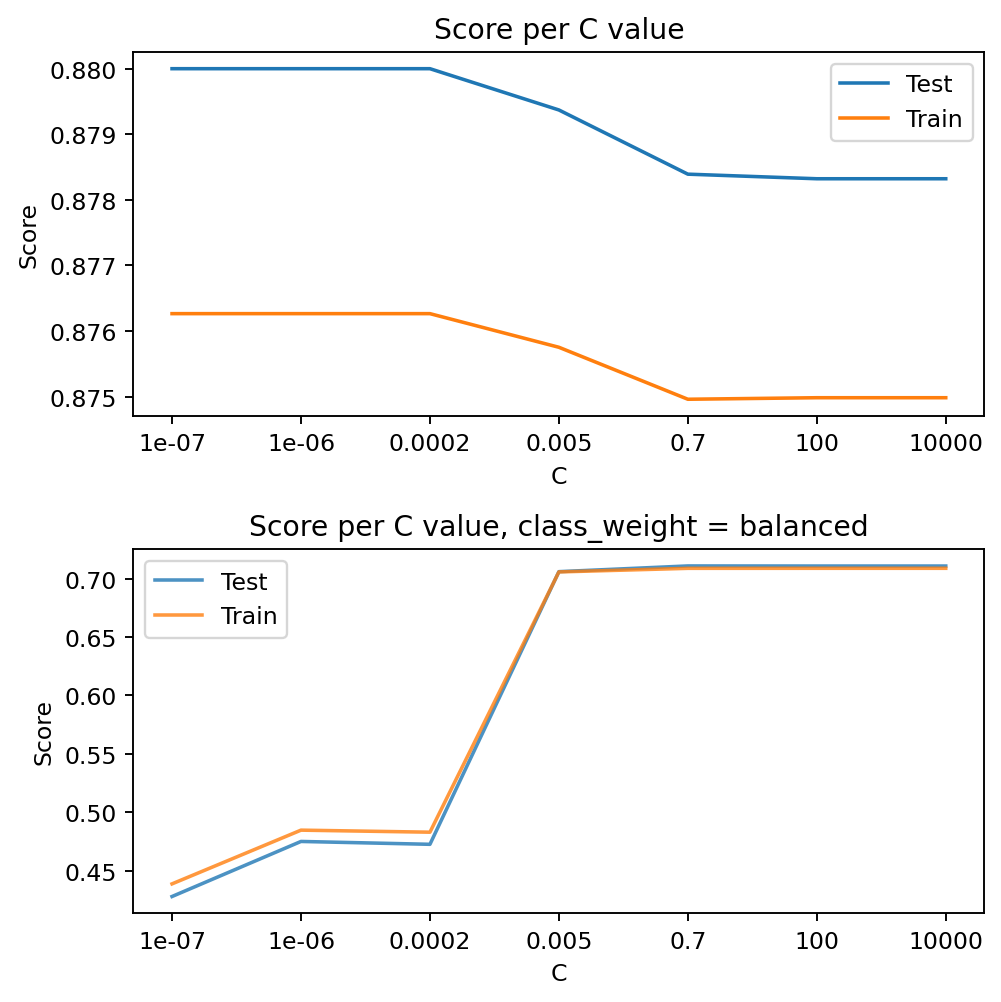

In [228]:
fig, ax = plt.subplots(nrows = 2, ncols=1, figsize = (6,6), dpi = 170)
ax[0].plot(range(len(results['C'])), results['Test Score'], label = 'Test')
ax[0].plot(range(len(results['C'])), results['Train Score'], label = 'Train')
ax[0].set_xticks(range(len(c_list)))
ax[0].set_xticklabels(c_list)
ax[0].legend()
ax[0].set(xlabel = 'C', ylabel = 'Score', title = 'Score per C value')

ax[1].plot(range(len(results_balanced['C'])), results_balanced['Test Score'], label = 'Test', alpha = 0.8)
ax[1].plot(range(len(results_balanced['C'])), results_balanced['Train Score'], label = 'Train', alpha = 0.8)
ax[1].set_xticks(range(len(c_list)))
ax[1].set_xticklabels(c_list)
ax[1].legend()
ax[1].set(xlabel = 'C', ylabel = 'Score', title = 'Score per C value, class_weight = balanced')

plt.tight_layout()
plt.show()

In [229]:
find_best_c(c_list, results_small['Test Score'])

'The C value that gives the highest test score is 0.0000001 and the score is 88.00027987685418%'

In [230]:
find_best_c(c_list, results_small_balanced['Test Score'])

'The C value that gives the highest test score is 0.7000000 and the score is 71.09571788413098%'

### Evaluating the models

#### Model without class_weight = 'balanced'

In [231]:
l_reg_small = LogisticRegression(C = 0.0000001)
l_reg_small.fit(X_train, y_train)

print('With our final Logistic regression model we are able to get a test score of {:.14%}'.format(l_reg_small.score(X_test, y_test)))

With our final Logistic regression model we are able to get a test score of 88.00027987685418%


In [232]:
sorted(list(zip(X.columns, np.exp((l_reg_small.coef_[0])))), key=lambda x: x[1], reverse = True)[:10]

[('Vehicle_Damage', 1.000137414592031),
 ('Region_Code_28', 1.0000570552298238),
 ('Policy_Sales_Channel_26', 1.0000380415095884),
 ('Vehicle_Age_> 2 Years', 1.0000236513189618),
 ('Policy_Sales_Channel_124', 1.0000227090045501),
 ('Vehicle_Age_1-2 Year', 1.0000192653072517),
 ('Policy_Sales_Channel_122', 1.0000042665744813),
 ('Policy_Sales_Channel_154', 1.000003863393709),
 ('Policy_Sales_Channel_163', 1.000002397556542),
 ('Policy_Sales_Channel_25', 1.0000019887664486)]

In [233]:
sorted(list(zip(X.columns, np.exp((l_reg_small.coef_[0])))), key=lambda x: x[1], reverse = True)[-10:]

[('Region_Code_8', 0.9999852428500048),
 ('Annual_Premium', 0.9999706746214857),
 ('Policy_Sales_Channel_160', 0.999966439846656),
 ('Gender', 0.9999519594177376),
 ('Driving_License', 0.9998622171135632),
 ('Policy_Sales_Channel_152', 0.9998391275723814),
 ('Vehicle_Age_< 1 Year', 0.999818898770363),
 ('Previously_Insured', 0.9997410966874424),
 ('Age', 0.996929496569325),
 ('Vintage', 0.9949799112500729)]

In [234]:
confusion_matrix(y_test, l_reg_small.predict(X_test))

array([[12577,     0],
       [ 1715,     0]])

In [235]:
print(classification_report(y_test, l_reg_small.predict(X_test), target_names = ['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.88      1.00      0.94     12577
    Interested       0.00      0.00      0.00      1715

      accuracy                           0.88     14292
     macro avg       0.44      0.50      0.47     14292
  weighted avg       0.77      0.88      0.82     14292



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model with class_weight = 'balanced'

In [236]:
l_reg_small_balanced = LogisticRegression(C = 0.7000000, class_weight = 'balanced')
l_reg_small_balanced.fit(X_train, y_train)

print('With our final balanced Logistic regression model we are able to get a test score of {:.14%}'.format(l_reg_small_balanced.score(X_test, y_test)))

With our final balanced Logistic regression model we are able to get a test score of 71.09571788413098%


In [237]:
sorted(list(zip(X.columns, np.exp((l_reg_small_balanced.coef_[0])))), key=lambda x: x[1], reverse = True)[:10]

[('Vehicle_Damage', 4.433923562311534),
 ('Vehicle_Age_1-2 Year', 1.6223554161443465),
 ('Region_Code_28', 1.54902106765487),
 ('Policy_Sales_Channel_26', 1.4039148159233752),
 ('Policy_Sales_Channel_124', 1.3441510925164706),
 ('Vehicle_Age_> 2 Years', 1.1974342023467897),
 ('Policy_Sales_Channel_156', 1.061301718316595),
 ('Gender', 1.053498438293189),
 ('Policy_Sales_Channel_157', 1.0520766092001954),
 ('Policy_Sales_Channel_154', 1.0504737095699708)]

In [238]:
sorted(list(zip(X.columns, np.exp((l_reg_small_balanced.coef_[0])))), key=lambda x: x[1], reverse = True)[-10:]

[('Region_Code_6', 0.9681772320799232),
 ('Region_Code_50', 0.9505595658536209),
 ('Region_Code_30', 0.9485656754986238),
 ('Region_Code_15', 0.9457961291400482),
 ('Region_Code_8', 0.9108653379667677),
 ('Policy_Sales_Channel_160', 0.849221473732867),
 ('Driving_License', 0.7884416743048416),
 ('Policy_Sales_Channel_152', 0.40744342076176404),
 ('Vehicle_Age_< 1 Year', 0.4041399584829147),
 ('Previously_Insured', 0.19133817491300023)]

In [239]:
confusion_matrix(y_test, l_reg_small_balanced.predict(X_test))

array([[8663, 3914],
       [ 217, 1498]])

In [240]:
print(classification_report(y_test, l_reg_small_balanced.predict(X_test), target_names=['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.98      0.69      0.81     12577
    Interested       0.28      0.87      0.42      1715

      accuracy                           0.71     14292
     macro avg       0.63      0.78      0.61     14292
  weighted avg       0.89      0.71      0.76     14292



### Logistic regression model on manually balanced small size dataset

In [3]:
df_small_balanced = pd.read_csv('../data/pre-processed-data/data-small-size-balanced.csv')
df_small_balanced

,Unnamed: 0,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,194037,194038,1,43,1,0,1,2630.0,46,1,...,0,0,0,0,0,0,0,1,0,0
1,166096,166097,1,28,1,0,1,2630.0,281,1,...,0,0,1,0,0,0,0,1,0,0
2,228045,228046,0,34,1,0,1,50812.0,145,1,...,0,0,0,0,0,0,0,1,0,0
3,281334,281335,1,43,1,0,1,39089.0,21,1,...,0,0,0,0,0,0,0,1,0,0
4,102730,102731,1,44,1,0,1,34162.0,115,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57161,121826,121827,0,45,1,1,0,30700.0,223,0,...,0,0,0,0,0,0,0,1,0,0
57162,95522,95523,0,24,1,1,0,38563.0,108,0,...,0,0,0,0,0,0,0,0,1,0
57163,380876,380877,1,20,1,1,0,2630.0,99,0,...,0,0,0,0,0,1,0,0,1,0
57164,68994,68995,0,22,1,1,0,31883.0,264,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df_small_balanced['Response'].value_counts()

1    28583
0    28583
Name: Response, dtype: int64

In [5]:
X = df_small_balanced.drop('Response', axis = 1)
y = df_small_balanced['Response']

In [7]:
X_train, _, y_train, _ = train_test_split(X, y, random_state = 12)

In [17]:
test_size = len(df_small_balanced.sample(frac=0.33))
test_df = df.sample(n=test_size)
test_df['Response'].value_counts()

0    16574
1     2291
Name: Response, dtype: int64

In [18]:
X_test = test_df.drop('Response', axis = 1)
y_test = test_df['Response']

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42874, 220)
(42874,)
(18865, 220)
(18865,)


In [24]:
l_reg_small_manually_balanced = LogisticRegression(C = 0.4)
l_reg_small_manually_balanced.fit(X_train, y_train)

print('With our initial logistic regression model on our manually balanced dataset we are able to get a score of {}'.format(l_reg_small_manually_balanced.score(X_test, y_test)))

With our initial logistic regression model on our manually balanced dataset we are able to get a score of 0.4441028359395706


In [33]:
c_list_2 = [0.00000000000001, 0.0000000123344, 0.0000007, 2, 70, 400, 1000, 100000000]
results_manually_balanced = logistic_c_trials(c_list_2, X_train, X_test, y_train, y_test)

In [34]:
results_manually_balanced

{'Train Score': [0.508280076503242,
  0.512035266128656,
  0.512035266128656,
  0.512035266128656,
  0.512035266128656,
  0.512035266128656,
  0.512035266128656,
  0.512035266128656],
 'Test Score': [0.6670023853697323,
  0.4441028359395706,
  0.4441028359395706,
  0.4441028359395706,
  0.4441028359395706,
  0.4441028359395706,
  0.4441028359395706,
  0.4441028359395706],
 'C': [1e-14, 1.23344e-08, 7e-07, 2, 70, 400, 1000, 100000000]}

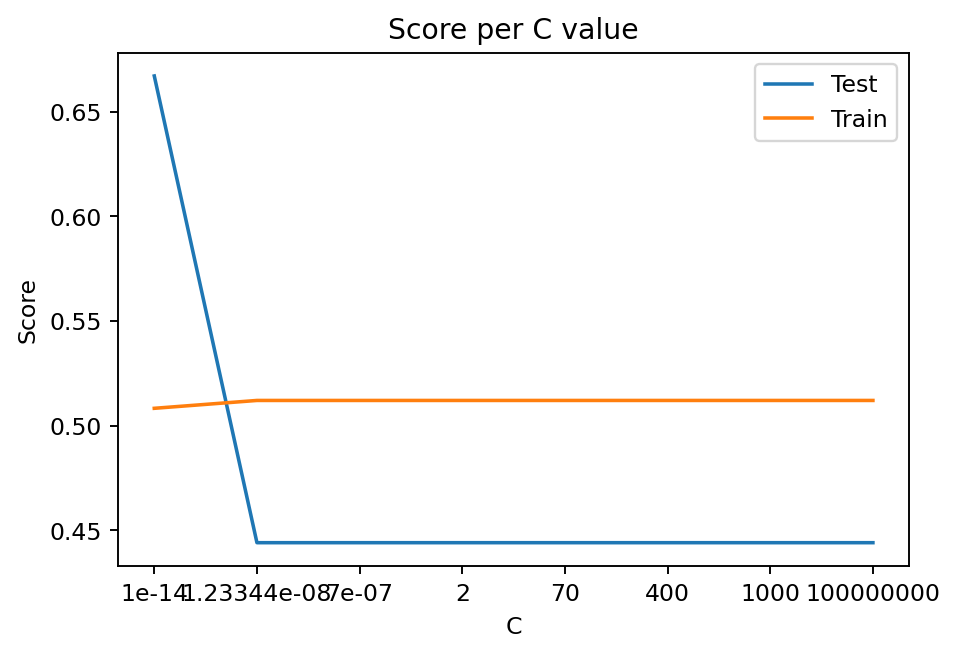

In [35]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 170)
ax.plot(range(len(results_manually_balanced['C'])), results_manually_balanced['Test Score'], label = 'Test')
ax.plot(range(len(results_manually_balanced['C'])), results_manually_balanced['Train Score'], label = 'Train')
ax.set_xticks(range(len(c_list_2)))
ax.set_xticklabels(c_list_2)
ax.legend()
ax.set(xlabel = 'C', ylabel = 'Score', title = 'Score per C value')

plt.show()

In [37]:
#We can see in the c_list_2 that this is the second entry of the list, which is 0.00000000000001. It does not show the entire string due to some formatting. 
find_best_c(c_list_2, results_manually_balanced['Test Score'])

'The C value that gives the highest test score is 0.0000000 and the score is 66.70023853697323%'

#### Evaluating the model

In [39]:
l_reg_small_manually_balanced = LogisticRegression(C = 0.00000000000001)
l_reg_small_manually_balanced.fit(X_train, y_train)

print('With our final manually balanced Logistic regression model we are able to get a test score of {:.14%}'.format(l_reg_small_manually_balanced.score(X_test, y_test)))

With our final manually balanced Logistic regression model we are able to get a test score of 66.70023853697323%


In [40]:
sorted(list(zip(X.columns, np.exp((l_reg_small_manually_balanced.coef_[0])))), key=lambda x: x[1], reverse = True)[:10]

[('Annual_Premium', 1.000000154141902),
 ('Age', 1.0000000006003813),
 ('Vintage', 1.0000000000638662),
 ('Vehicle_Damage', 1.0000000000576514),
 ('Vehicle_Age_1-2 Year', 1.0000000000274016),
 ('Region_Code_28', 1.0000000000185238),
 ('Policy_Sales_Channel_26', 1.0000000000164961),
 ('Policy_Sales_Channel_124', 1.000000000013065),
 ('Gender', 1.000000000008632),
 ('Vehicle_Age_> 2 Years', 1.0000000000073055)]

In [41]:
sorted(list(zip(X.columns, np.exp((l_reg_small_manually_balanced.coef_[0])))), key=lambda x: x[1], reverse = True)[-10:]

[('Region_Code_30', 0.99999999999853),
 ('Region_Code_50', 0.9999999999981852),
 ('Region_Code_15', 0.9999999999980391),
 ('Region_Code_8', 0.9999999999978499),
 ('Policy_Sales_Channel_160', 0.9999999999942573),
 ('Policy_Sales_Channel_152', 0.9999999999669362),
 ('Vehicle_Age_< 1 Year', 0.9999999999658539),
 ('Previously_Insured', 0.9999999999452102),
 ('id', 0.9999999790020103),
 ('Unnamed: 0', 0.9999999790014495)]

In [42]:
confusion_matrix(y_test, l_reg_small_manually_balanced.predict(X_test))

array([[11860,  4714],
       [ 1568,   723]])

In [43]:
print(classification_report(y_test, l_reg_small_manually_balanced.predict(X_test), target_names=['Not interested', 'Interested']))

                precision    recall  f1-score   support

Not interested       0.88      0.72      0.79     16574
    Interested       0.13      0.32      0.19      2291

      accuracy                           0.67     18865
     macro avg       0.51      0.52      0.49     18865
  weighted avg       0.79      0.67      0.72     18865

